In [1]:
import os
import subprocess
from smt.sampling_methods import LHS

import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import seaborn as sns
from scipy import stats
from surmise.emulation import emulator
import emcee
import h5py

from dt import cross_section, s_factor

In [2]:
plt.style.use('science')
gr = 4/3
h = 3

plt.rcParams['figure.dpi'] = 300

In [3]:
# Other parameters that we are not trying to emulate yet.
AD = 6.0
AN = 4.0
UE = 0.0
A = 0.0
# Reduced mass in the deuteron channel.
MU_D = 1124.6473494927284 # MeV

# Our physics model.
def f(energy, theta):
    er, gd2, gn2 = theta
    return s_factor(energy, er, er, gd2, gn2, AD, AN, UE, A)

parameter_labels = [r'$E_r$', r'$\gamma_d^2$', r'$\gamma_n^2$']

In [49]:
train = np.loadtxt('datfiles/better_training_data.txt')[2500:, :]
test = np.loadtxt('datfiles/better_testing_data.txt')

In [50]:
ns, nd = train.shape
nk = np.unique(train[:, 0]).size # number of momenta
ntrain = ns // nk
ntest = test.shape[0] // nk

In [51]:
train[:, 0]

array([ 4.74267298,  4.74267298,  4.74267298, ..., 21.20987835,
       21.20987835, 21.20987835])

In [52]:
x = train[::ntrain, 0].reshape(-1, 1) # input/location/momentum
w = train[:ntrain, 1:4] # parameters that we want to emulate
y = train[:, -1].reshape(nk, ntrain) # output/cross section

In [53]:
from scipy.interpolate import interp1d

In [54]:
xp = np.linspace(x[0], x[-1], 100)

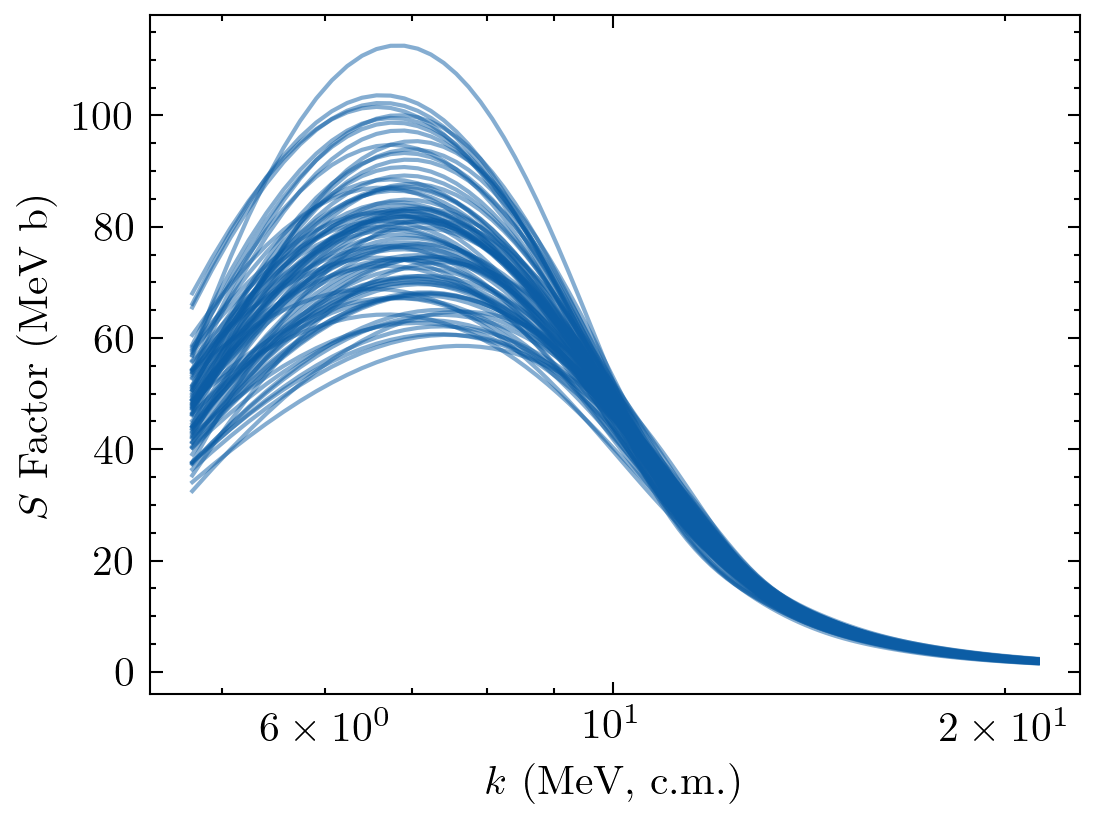

In [56]:
fig, ax = plt.subplots(figsize=(gr*h, h))
fig.patch.set_facecolor('white')

for curve in y.T[::3, :]:
    f = interp1d(x.flatten(), curve, kind='cubic')
    ax.plot(xp, f(xp), color='C0', alpha=0.5)

ax.set_xlabel('$k$ (MeV, c.m.)')
ax.set_ylabel('$S$ Factor (MeV b)')
ax.set_xscale('log');